### Exercici 2

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

movies = pd.read_table('/Users/alexvalles/Desktop/Data Science/Curso Data Science Presencial/Sprint 4/movies.dat', sep = '::', names = ['Movie_id', 'Titulo', 'Genero'], encoding = 'ISO-8859-1')
movies.head()

,Movie_id,Titulo,Genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [102]:
movies.shape

(3883, 3)

In [103]:
movies.head(10)

,Movie_id,Titulo,Genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [104]:
# extraemos el año de la columna título, quedando éste en una nueva columna.

movies['Año'] = movies['Titulo'].str.extract(r'\((\d{4})\)')

print(movies)

      Movie_id                              Titulo  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
3878      3948             Meet the Parents (2000)   
3879      3949          Requiem for a Dream (2000)   
3880      3950                    Tigerland (2000)   
3881      3951             Two Family House (2000)   
3882      3952               Contender, The (2000)   

                            Genero   Año  
0      Animation|Children's|Comedy  1995  
1     Adventure|Children's|Fantasy  1995  
2                   Comedy|Romance  1995  
3                     Comedy|Drama  1995  
4                           Comedy  1995  
...                            ...   ...  
3878                        Comedy  2000  
3879   

In [105]:
movies['Titulo'] = movies['Titulo'].str.replace(r'\(\d{4}\)', '', regex=True)

# Mostrar el DataFrame con el año eliminado de la columna 'Titulo'
print(movies)

      Movie_id                        Titulo                        Genero  \
0            1                    Toy Story    Animation|Children's|Comedy   
1            2                      Jumanji   Adventure|Children's|Fantasy   
2            3             Grumpier Old Men                 Comedy|Romance   
3            4            Waiting to Exhale                   Comedy|Drama   
4            5  Father of the Bride Part II                         Comedy   
...        ...                           ...                           ...   
3878      3948             Meet the Parents                         Comedy   
3879      3949          Requiem for a Dream                          Drama   
3880      3950                    Tigerland                          Drama   
3881      3951             Two Family House                          Drama   
3882      3952               Contender, The                 Drama|Thriller   

       Año  
0     1995  
1     1995  
2     1995  
3     1995 

In [106]:
# editamos el género: eliminamos '|' y dejamos solo un género, 
# en este caso el primero de todos

movies['Genero'] = movies['Genero'].str.split('|').str[0]


print(movies)

      Movie_id                        Titulo     Genero   Año
0            1                    Toy Story   Animation  1995
1            2                      Jumanji   Adventure  1995
2            3             Grumpier Old Men      Comedy  1995
3            4            Waiting to Exhale      Comedy  1995
4            5  Father of the Bride Part II      Comedy  1995
...        ...                           ...        ...   ...
3878      3948             Meet the Parents      Comedy  2000
3879      3949          Requiem for a Dream       Drama  2000
3880      3950                    Tigerland       Drama  2000
3881      3951             Two Family House       Drama  2000
3882      3952               Contender, The       Drama  2000

[3883 rows x 4 columns]


In [107]:
movies = movies.drop('Movie_id', axis=1)

# Ahora dejamos el DataFrame sin la columna 'Movie_id'

print(movies)

                            Titulo     Genero   Año
0                       Toy Story   Animation  1995
1                         Jumanji   Adventure  1995
2                Grumpier Old Men      Comedy  1995
3               Waiting to Exhale      Comedy  1995
4     Father of the Bride Part II      Comedy  1995
...                            ...        ...   ...
3878             Meet the Parents      Comedy  2000
3879          Requiem for a Dream       Drama  2000
3880                    Tigerland       Drama  2000
3881             Two Family House       Drama  2000
3882               Contender, The       Drama  2000

[3883 rows x 3 columns]


In [108]:
# Ya tenemos el dataframe depurado, con las columnas Título, Género (sólo 1) y año

movies

,Titulo,Genero,Año
0,Toy Story,Animation,1995
1,Jumanji,Adventure,1995
2,Grumpier Old Men,Comedy,1995
3,Waiting to Exhale,Comedy,1995
4,Father of the Bride Part II,Comedy,1995
...,...,...,...
3878,Meet the Parents,Comedy,2000
3879,Requiem for a Dream,Drama,2000
3880,Tigerland,Drama,2000
3881,Two Family House,Drama,2000


### Exercici 3

#### 3.1 --> Gráfica de los 10 años con más películas estrenadas:

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1919      3
1922      2
1920      2
1921      1
Name: Año, Length: 81, dtype: int64


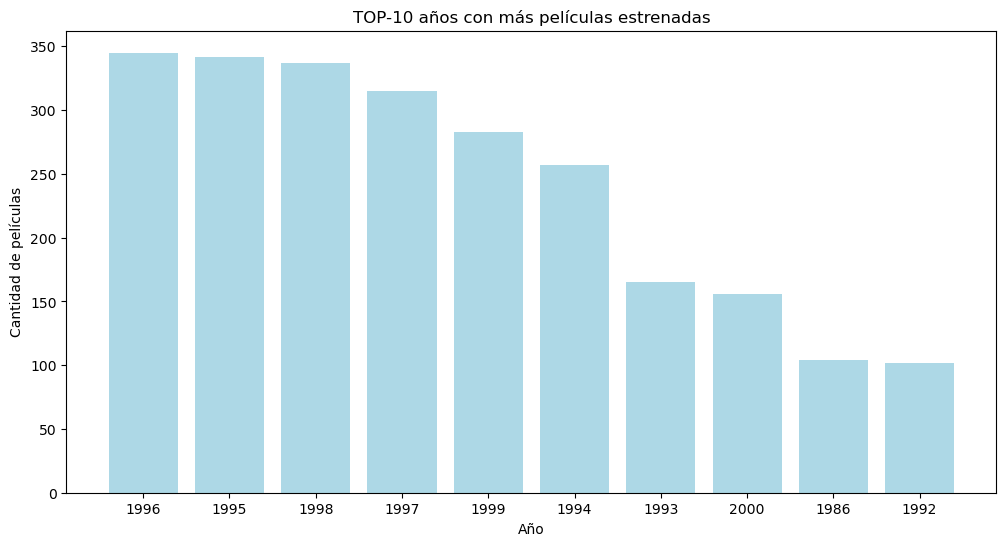

In [109]:
# Contamos la cantidad de películas por año
count_años = movies['Año'].value_counts()
print(count_años)

# Seleccionamos los 10 años con más películas
top_10 = count_años.head(10)

# Creamos un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_10.index, top_10.values, color='lightblue')
plt.title('TOP-10 años con más películas estrenadas')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')


plt.show()

Con esta gráfica visualizamos una lista de los 10 años en los que han habido más estrenos de películas ("Top 10" de estrenos), de cualquier género. Vemos que se concentran en los años 90 principalmente, encabezando esta lista, el año 1996 con casi 345 películas, seguido de los años 1995 (342 películas), 1998 (337 pelis) y 1997 (315 pelis).


#### 3.2 --> Gráfica de número de películas por género:

Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Film-Noir        25
Musical          25
War              12
Fantasy           2
Name: Genero, dtype: int64


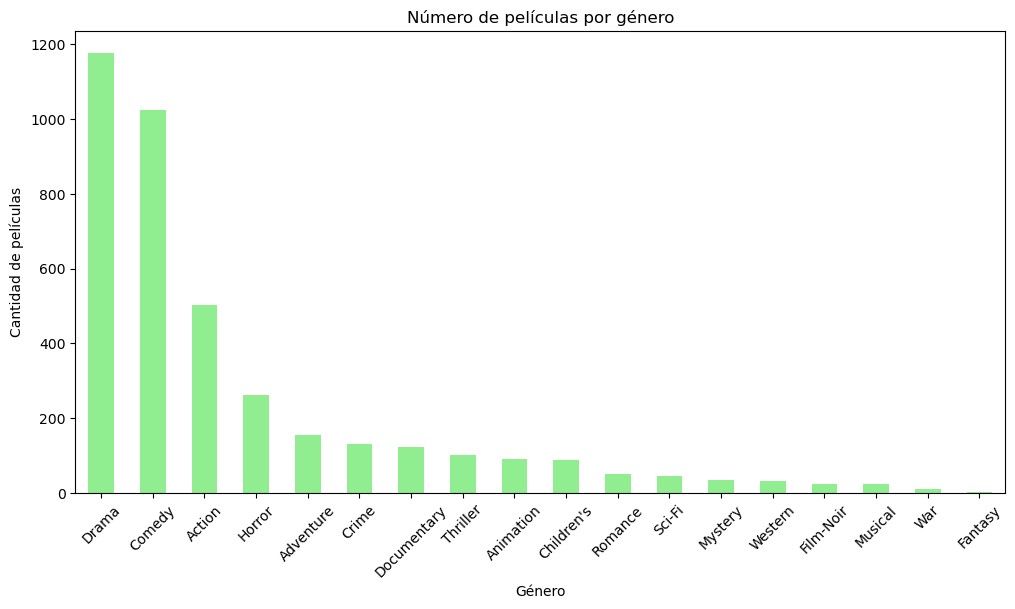

In [110]:
count_generos = movies['Genero'].value_counts()

print(count_generos)

# Obtener el género con más películas
genero_mas_frecuente = count_generos.idxmax()

# hacemos gráfico de barras

plt.figure(figsize=(12, 6))
count_generos.plot(kind='bar', color='lightgreen')
plt.title('Número de películas por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=45)

plt.show()

Los géneros de películas con más estrenos a lo largo de los años (en todo nuestro dataframe), son en primer lugar los dramas (con 1176 películas estrenadas), seguido de comedias (1024 estrenos) y películas de acción (503 estrenos). Por los contrario, los géneros menos frecuentes son las películas de fantasía (sólo 2 peliculas), bélicas (12 estrenos) y musicales (25 estrenos), entre otros.